In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from lib.util import *

plt.style.use("ggplot")

In [6]:
df = pd.read_json("../data/preprocessed/preprocessed.json", orient="index")
with open("../data/preprocessed/param.json", "r") as f:
    params = json.load(f)
    print("params:", params)

user_n, item_n = params["user_n"], params["item_n"]

params: {'user_n': 1096, 'item_n': 3664}


In [7]:
uplift_based_nn_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(batch_size=1000, epochs=5000, model="nn", lmda=1e-8),
)

accuracy_based_nn_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(
        batch_size=1000,
        epochs=5000,
        sampling="accuracy-based-pointwise",
        model="nn",
        lmda=1e-8,
    ),
)

uplift_based_mf_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(batch_size=1000, epochs=5000, model="mf", lmda=1e-8),
)

accuracy_based_mf_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(
        batch_size=1000,
        epochs=5000,
        sampling="accuracy-based-pointwise",
        model="mf",
        lmda=1e-8,
    ),
)

100%|██████████| 1096/1096 [00:02<00:00, 439.35it/s]


{'Accuracy@10': 0.18894422310756973, 'Uplift@10': 0.007829791943337761, 'Accuracy@30': 0.09099804305283758, 'Uplift@30': 0.03838163330018725, 'Accuracy@100': 0.03566936790923825, 'Uplift@100': 0.02874850365478556}


100%|██████████| 1096/1096 [00:02<00:00, 449.94it/s]


{'Accuracy@10': 0.18113391984359725, 'Uplift@10': -0.0029073375847569424, 'Accuracy@30': 0.091064792373566, 'Uplift@30': 0.03400320646381725, 'Accuracy@100': 0.03545747422680413, 'Uplift@100': 0.029468843837748296}


100%|██████████| 1096/1096 [00:02<00:00, 434.90it/s]


{'Accuracy@10': 0.18207452165156093, 'Uplift@10': -0.00035286689365239055, 'Accuracy@30': 0.09772205834152738, 'Uplift@30': 0.02298502469060966, 'Accuracy@100': 0.03710569105691057, 'Uplift@100': 0.029217361317205835}


100%|██████████| 1096/1096 [00:02<00:00, 413.57it/s]


{'Accuracy@10': 0.16553398058252428, 'Uplift@10': 0.046807674526121106, 'Accuracy@30': 0.08821825205214871, 'Uplift@30': 0.03275049091893744, 'Accuracy@100': 0.03547879177377892, 'Uplift@100': 0.028412897262416883}


100%|██████████| 1096/1096 [00:02<00:00, 443.03it/s]


{'Accuracy@10': 0.16739562624254473, 'Uplift@10': 0.03420705923191008, 'Accuracy@30': 0.09075794621026895, 'Uplift@30': 0.027157469514937794, 'Accuracy@100': 0.03635126377187298, 'Uplift@100': 0.030212244944588452}


100%|██████████| 1096/1096 [00:03<00:00, 339.21it/s]


{'Accuracy@10': 0.17652859960552267, 'Uplift@10': 0.05848752387213934, 'Accuracy@30': 0.10092457420924573, 'Uplift@30': 0.018640391367777537, 'Accuracy@100': 0.0471156330749354, 'Uplift@100': 0.011168072908313044}


100%|██████████| 1096/1096 [00:03<00:00, 327.07it/s]


{'Accuracy@10': 0.19651741293532338, 'Uplift@10': 0.033367290531469675, 'Accuracy@30': 0.10586797066014669, 'Uplift@30': 0.022949596752211657, 'Accuracy@100': 0.049465327284510696, 'Uplift@100': 0.012024395272011646}


100%|██████████| 1096/1096 [00:03<00:00, 323.19it/s]


{'Accuracy@10': 0.1988071570576541, 'Uplift@10': 0.04056297137808082, 'Accuracy@30': 0.10669272105520274, 'Uplift@30': 0.021145941248755313, 'Accuracy@100': 0.05044041450777202, 'Uplift@100': 0.01230240024115413}


100%|██████████| 1096/1096 [00:03<00:00, 346.97it/s]


{'Accuracy@10': 0.19605522682445758, 'Uplift@10': 0.04135045865815095, 'Accuracy@30': 0.10652703360935217, 'Uplift@30': 0.021387032333168906, 'Accuracy@100': 0.050100193923723335, 'Uplift@100': 0.011653621931411649}


100%|██████████| 1096/1096 [00:03<00:00, 336.75it/s]


{'Accuracy@10': 0.19980217606330367, 'Uplift@10': 0.03926765892641264, 'Accuracy@30': 0.10915447154471544, 'Uplift@30': 0.022686438640589085, 'Accuracy@100': 0.051397605952766094, 'Uplift@100': 0.012928338754615566}


100%|██████████| 1096/1096 [00:02<00:00, 416.32it/s]


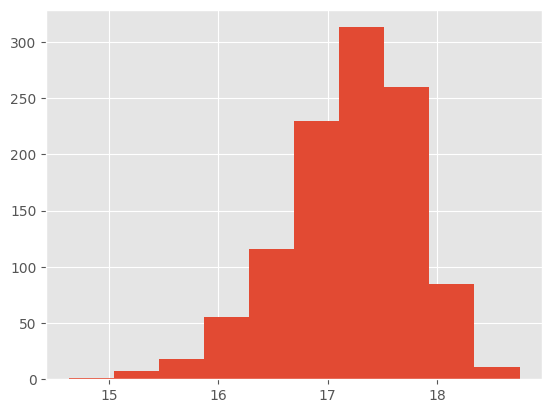

17.20279088099216


100%|██████████| 1096/1096 [00:02<00:00, 402.13it/s]


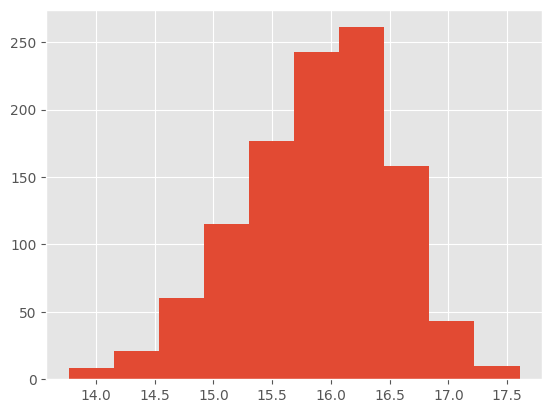

15.891539175551017


In [9]:
k = 30

for model in [uplift_based_mf_model, accuracy_based_mf_model]:
    model.eval()
    s = []
    for u in tqdm.tqdm(range(user_n)):
        y = model.forward(
            u=torch.LongTensor([u] * item_n),
            i=torch.arange(item_n),
        )
        rec_list = y.argsort().cpu().detach().numpy()[::-1][:k].tolist()
        embeddings = accuracy_based_nn_model.item_embedding.forward(
            torch.LongTensor(rec_list)
        ).cpu().detach().numpy()

        d = 0
        for i in range(k):
            for j in range(k):
                d += np.linalg.norm(embeddings[i] - embeddings[j])
        d /= k * k
        s.append(d)

    plt.hist(s)
    plt.show()
    print(sum(s) / len(s))